<a href="https://colab.research.google.com/github/umarzaib1/Super-Hero-Name-Generator-Using-TensorFlow-/blob/main/Superhero_Name_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [ ]:
!git clone https://github.com/am1tyadav/superhero

fatal: destination path 'superhero' already exists and is not an empty directory.


In [ ]:
with open('superhero/superheroes.txt','r') as f:
  data = f.read()

In [ ]:
data

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrha\t\nthe rhino\t\nmajor glory\t\ndrago\t\nking vegeta\t\nphoebus apollo\t\nwarpath\t\nthe lost sapphire\t\ndurok the demolisher\t\ncronos\t\ndragon warrior\t\nblaziken\t\nmighty destroyer\t\nthe firedrake of gondolin\t\nking kid\t\nstar boy\t\ndarth plagueis\t\nazrel\t\nhulk\t\ndark gaia phoenix\t\nklaw\t\nmichael demiurgos\t\nshilo norman\t\nspiderhulk\t\nzauriel\t\ndevo\t\nhypnotia\t\nqueen rhea\t\nfanor\t\nscourge\t\nxerneas\t\nbenjamin sisko\t\noutsiders\t\ncyclone\t\nking kong\t\nchronos\t\nsyn shenron\t\ncrimson chin\t\ncyborg\t\nhorsewoman\t\nbryan mills\t\nlothric  lorian\t\nsingularity\t\nblaise zabini\t\nsoldier \t\nmutant leader\t\nsymbiote electro\t\ndeath of death\t\ncyborg\t\nhiruzen sarutobi\t\navengelyne\t\nquicksilver\t\nnymphadora tonks\t\nkulan gath\t\nthe punisher\t\ntyrion lannister\t\npgell\t\ndamien darhk\t\nsquirrel girl\t\nras al ghul\t\nflas

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)
tokenizer.fit_on_texts(data)

In [ ]:
char_to_index = tokenizer.word_index
index_to_char = dict((v,k) for k, v in char_to_index.items())
print(index_to_char)

{1: '\t', 2: 'a', 3: 'e', 4: 'r', 5: 'o', 6: 'n', 7: 'i', 8: ' ', 9: 't', 10: 's', 11: 'l', 12: 'm', 13: 'h', 14: 'd', 15: 'c', 16: 'u', 17: 'g', 18: 'k', 19: 'b', 20: 'p', 21: 'y', 22: 'w', 23: 'f', 24: 'v', 25: 'j', 26: 'z', 27: 'x', 28: 'q'}


## Task 3

1. Converting between names and sequences

In [ ]:
names = data.splitlines()

In [ ]:
def name_to_seq(name):
  return[tokenizer.texts_to_sequences(c)[0][0] for c in name]

def seq_to_name(seq):
  return ''.join([index_to_char[i] for i in seq if i != 0])

In [ ]:
print(name_to_seq(names[0]))

print(seq_to_name(name_to_seq(names[0])))

[25, 16, 12, 20, 2, 1]
jumpa	


## Task 4

1. Creating sequences
2. Padding all sequences

In [ ]:
sequences = []

for name in names:
  seq = name_to_seq(name)
  if len(seq) >= 2:
    sequences += [seq[:i] for i in range(2, len(seq) + 1)]

In [ ]:
max_len = max([len(x) for x in sequences])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(
    sequences, padding = 'pre',
    maxlen = max_len
)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

In [ ]:
x, y = padded_sequences[:, :-1], padded_sequences[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
num_chars = len(char_to_index.keys()) + 1

## Task 6: Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.layers import Bidirectional, Dense

In [ ]:
model = Sequential([
    Embedding(num_chars, 6, input_shape = (max_len - 1,)),
    Conv1D(64, 5, strides = 1, activation = 'tanh', padding = 'causal'),
    MaxPooling1D(2),
    LSTM(32),
    Dense(num_chars, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.build()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 32, 6)          │           174 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 32, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 29)             │           957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,531 (60.67 KB)

 Trainable params: 15,531 (60.67 KB)

 Non-trainable params: 0 (0.00 B)

## Task 7: Training the Model

In [ ]:
h = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 50, verbose = 2,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/50
2070/2070 - 20s - 10ms/step - accuracy: 0.1878 - loss: 2.7538 - val_accuracy: 0.2190 - val_loss: 2.6014
Epoch 2/50
2070/2070 - 14s - 7ms/step - accuracy: 0.2261 - loss: 2.5596 - val_accuracy: 0.2355 - val_loss: 2.5186
Epoch 3/50
2070/2070 - 14s - 7ms/step - accuracy: 0.2464 - loss: 2.4872 - val_accuracy: 0.2552 - val_loss: 2.4610
Epoch 4/50
2070/2070 - 14s - 7ms/step - accuracy: 0.2598 - loss: 2.4430 - val_accuracy: 0.2657 - val_loss: 2.4304
Epoch 5/50
2070/2070 - 14s - 7ms/step - accuracy: 0.2713 - loss: 2.4097 - val_accuracy: 0.2689 - val_loss: 2.4040
Epoch 6/50
2070/2070 - 15s - 7ms/step - accuracy: 0.2806 - loss: 2.3800 - val_accuracy: 0.2775 - val_loss: 2.3911
Epoch 7/50
2070/2070 - 14s - 7ms/step - accuracy: 0.2903 - loss: 2.3545 - val_accuracy: 0.2870 - val_loss: 2.3599
Epoch 8/50
2070/2070 - 14s - 7ms/step - accuracy: 0.2956 - loss: 2.3295 - val_accuracy: 0.2921 - val_loss: 2.3451
Epoch 9/50
2070/2070 - 14s - 7ms/step - accuracy: 0.3016 - loss: 2.3076 - val_accuracy:

## Task 8: Generate Names!

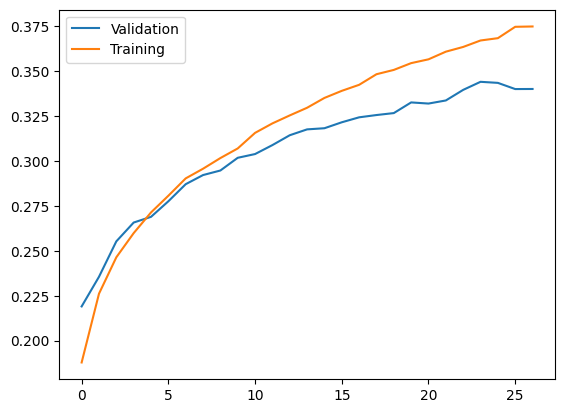

In [ ]:
from matplotlib import pyplot as plt

epochs_ran = len(h.history['loss'])

plt.plot(range(0, epochs_ran), h.history['val_accuracy'], label = 'Validation')
plt.plot(range(0, epochs_ran), h.history['accuracy'], label = 'Training')
plt.legend()
plt.show()

In [ ]:
def generate_names(seed):
  for i in range(0, 40):
    seq = name_to_seq(seed)
    padded = tf.keras.preprocessing.sequence.pad_sequences([seq], padding = 'pre',
                                                           maxlen = max_len - 1,
                                                           truncating = 'pre')
    pred = model.predict(padded)[0]
    pred_char = index_to_char[tf.argmax(pred).numpy()]
    seed += pred_char

    if pred_char == '\t':
      break
  return seed

In [ ]:
print(generate_names('ja'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
jack the strange	


In [ ]:
print(generate_names('iro'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
iron man	


In [ ]:
print(generate_names('su'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
superman	


## Save the trained model


In [ ]:
model.save('superhero_name_generator_model.h5')